In [1]:
import pandas as pd
import numpy as np
from data_encoding_utilities import encode_categorical_columns
import matplotlib.pyplot as plt
import seaborn as sns
import data_eda_utilities as eda

In [2]:
df = pd.read_csv('../Data/airline_delay_prices_age_storm.csv')

/var/folders/vd/dmj076xx2t38kz00wdhlwgqh0000gn/T/ipykernel_17506/1110854256.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/airline_delay_prices_age_storm.csv')


In [3]:
df.describe()

,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,...,DistanceGroup,mkt_fare,Unit Cost,Average Age,MAGNITUDE,CATEGORY,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT
count,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06,...,1.917689e+06,1.917689e+06,1.525136e+06,1.525136e+06,1.917689e+06,0.0,1.917689e+06,1.917689e+06,1.917689e+06,1.917689e+06
mean,1.365708e+03,1.373881e+03,1.450610e+01,1.669890e+01,2.328746e-01,1.494130e+03,1.472240e+03,1.409698e+01,1.930330e+01,2.716322e-01,...,2.370335e+00,1.389462e+02,7.690879e+01,1.542397e+01,3.312464e+01,NaN,2.548380e-02,8.628094e-03,1.054863e-02,4.355242e-03
std,4.869585e+02,5.058178e+02,4.557682e+01,4.467631e+01,4.226631e-01,5.017853e+02,5.357189e+02,4.963945e+01,4.705185e+01,4.448013e-01,...,1.021911e+00,7.619390e+01,6.407962e+00,5.020536e+00,1.959366e+01,NaN,6.869663e-01,5.507393e-01,1.502182e-01,8.135867e-02
min,8.000000e+00,1.000000e+00,-3.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-5.600000e+01,0.000000e+00,0.000000e+00,...,1.000000e+00,6.529000e+01,6.600000e+01,9.200000e+00,2.500000e-01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.390000e+02,9.410000e+02,-4.000000e+00,0.000000e+00,0.000000e+00,1.100000e+03,1.047000e+03,-9.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,7.762000e+01,7.400000e+01,1.170000e+01,3.633893e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.352000e+03,1.358000e+03,-1.000000e+00,0.000000e+00,0.000000e+00,1.515000e+03,1.509000e+03,-1.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,9.711000e+01,7.400000e+01,1.170000e+01,3.633893e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.800000e+03,1.814000e+03,1.200000e+01,1.200000e+01,0.000000e+00,1.920000e+03,1.922000e+03,1.700000e+01,1.700000e+01,1.000000e+00,...,3.000000e+00,1.949500e+02,7.500000e+01,2.274000e+01,4.800000e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.359000e+03,2.400000e+03,1.274000e+03,1.274000e+03,1.000000e+00,2.359000e+03,2.400000e+03,1.260000e+03,1.260000e+03,1.000000e+00,...,7.000000e+00,3.856100e+02,9.800000e+01,2.274000e+01,1.290000e+02,NaN,7.500000e+01,7.000000e+01,6.000000e+00,3.000000e+00


In [4]:
df.dtypes

FlightDate                      object
Reporting_Airline               object
IATA_CODE_Reporting_Airline     object
CRSDepTime                       int64
DepTime                        float64
DepDelay                       float64
DepDelayMinutes                float64
DepDel15                       float64
DepTimeBlk                      object
CRSArrTime                       int64
ArrTime                        float64
ArrDelay                       float64
ArrDelayMinutes                float64
ArrDel15                       float64
ArrTimeBlk                      object
CRSElapsedTime                 float64
ActualElapsedTime              float64
AirTime                        float64
Distance                       float64
DistanceGroup                    int64
OriginState                     object
DestState                       object
car                             object
city1                           object
city2                           object
mkt_fare                 

In [5]:
airline_to_iata = df.groupby('Reporting_Airline')['IATA_CODE_Reporting_Airline'].nunique()

# Group by IATA code and count unique airline names
iata_to_airline = df.groupby('IATA_CODE_Reporting_Airline')['Reporting_Airline'].nunique()

# Check if all counts are 1 (i.e., one-to-one relationship)
is_one_to_one = airline_to_iata.max() == 1 and iata_to_airline.max() == 1

print("Is one-to-one mapping:", is_one_to_one)

Is one-to-one mapping: True


In [6]:
df.drop(columns=['IATA_CODE_Reporting_Airline'], inplace=True)

In [7]:
df['Reporting_Airline'].unique()

array(['AA', 'AS', 'B6', 'DL', 'VX', 'WN', 'UA', 'F9', 'NK'], dtype=object)

In [8]:
airline_to_car = df.groupby('Reporting_Airline')['car'].nunique()

# Group by car and count unique airline names
car_to_airline = df.groupby('car')['Reporting_Airline'].nunique()

# Check if all counts are 1 (i.e., one-to-one relationship)
is_one_to_one = airline_to_car.max() == 1 and car_to_airline.max() == 1

print("Is one-to-one mapping:", is_one_to_one)

Is one-to-one mapping: True


In [9]:
df.drop(columns=['car'], inplace=True)

In [10]:
df['OriginState']

OriginState_to_state1 = df.groupby('OriginState')['state1'].nunique()

# Group by car and count unique airline names
state1_to_OriginState = df.groupby('state1')['OriginState'].nunique()

# Check if all counts are 1 (i.e., one-to-one relationship)
is_one_to_one = OriginState_to_state1.max() == 1 and state1_to_OriginState.max() == 1

print("Is one-to-one mapping:", is_one_to_one)

Is one-to-one mapping: True


In [11]:
df.drop(columns=['state1'], inplace=True)

In [12]:
df['OriginState']

DestState_to_state2 = df.groupby('DestState')['state2'].nunique()

# Group by car and count unique airline names
state2_to_DestState = df.groupby('state2')['DestState'].nunique()

# Check if all counts are 1 (i.e., one-to-one relationship)
is_one_to_one = DestState_to_state2.max() == 1 and state2_to_DestState.max() == 1

print("Is one-to-one mapping:", is_one_to_one)

Is one-to-one mapping: True


In [13]:
df.drop(columns=['state2'], inplace=True)

In [14]:
airline_to_IATA = df.groupby('Reporting_Airline')['IATA'].nunique()

# Group by IATA and count unique airline names
IATA_to_airline = df.groupby('IATA')['Reporting_Airline'].nunique()

# Check if all counts are 1 (i.e., one-to-one relationship)
is_one_to_one = airline_to_IATA.max() == 1 and IATA_to_airline.max() == 1

print("Is one-to-one mapping:", is_one_to_one)

Is one-to-one mapping: True


In [15]:
df.drop(columns=['IATA'], inplace=True)

In [16]:
df.drop(columns=['DATE'], inplace=True)

In [17]:
state_to_DestState = df.groupby('STATE')['DestState'].nunique()

# Group by IATA and count unique airline names
DestState_to_state = df.groupby('DestState')['STATE'].nunique()

# Check if all counts are 1 (i.e., one-to-one relationship)
is_one_to_one = state_to_DestState.max() == 1 and DestState_to_state.max() == 1

print("Is one-to-one mapping:", is_one_to_one)

Is one-to-one mapping: True


In [18]:
df.drop(columns=['STATE'], inplace=True)

In [19]:
# renaming columns for better readability, dropping unncessary columns
df.rename(columns={'Reporting_Airline': 'Airline_Code'}, inplace=True)
df.rename(columns={'CRSDepTime': 'Scheduled_Dep_Time_hhmm'}, inplace=True)
df.rename(columns={'DepTime': 'Actual_Dep_Time_hhmm'}, inplace=True)
df.rename(columns={'DepDelay': 'Dep_Delay_min'}, inplace=True)
df.drop(columns=['DepDelayMinutes'], inplace=True)
df.rename(columns={'DepDel15': 'If_Dep_Del_Over_15'}, inplace=True)
df.drop(columns=['DepTimeBlk'], inplace=True)
df.rename(columns={'CRSArrTime': 'Scheduled_Actual_Arr_Time_hhmm'}, inplace=True)
df.rename(columns={'ArrTime': 'Actual_Arr_Time_hhmm'}, inplace=True)
df.rename(columns={'ArrDelay': 'Arr_Delay_min'}, inplace=True)
df.drop(columns=['ArrDelayMinutes'], inplace=True)
df.rename(columns={'ArrDel15': 'If_Arr_Del_Over_15_min'}, inplace=True)
df.drop(columns=['ArrTimeBlk'], inplace=True)
df.rename(columns={'CRSElapsedTime': 'Scheduled_Elapsed_Time_min'}, inplace=True)
df.rename(columns={'ActualElapsedTime': 'Actual_Elapsed_Time_min'}, inplace=True)
df.rename(columns={'AirTime': 'AirTime_min'}, inplace=True)
df.rename(columns={'Distance': 'Distance_miles'}, inplace=True)
df.drop(columns=['DistanceGroup'], inplace=True)
df.rename(columns={'city1': 'Origin_City'}, inplace=True)
df.rename(columns={'city2': 'Dest_City'}, inplace=True)
df.rename(columns={'mkt_fare': 'Fare'}, inplace=True)
df.rename(columns={'Unit Cost': 'Airplane_Cost_millions'}, inplace=True)
df.rename(columns={'Average Age': 'Avg_Airline_Planes_Age'}, inplace=True)
df.rename(columns={'EVENT_TYPE': 'WEATHER_TYPE'}, inplace=True)
df.drop(columns=['MAGNITUDE_TYPE'], inplace=True)
df.drop(columns=['CATEGORY'], inplace=True)
df.rename(columns={'SOURCE': 'WEATHER_SOURCE'}, inplace=True)

In [20]:
df

,FlightDate,Airline_Code,Scheduled_Dep_Time_hhmm,Actual_Dep_Time_hhmm,Dep_Delay_min,If_Dep_Del_Over_15,Scheduled_Actual_Arr_Time_hhmm,Actual_Arr_Time_hhmm,Arr_Delay_min,If_Arr_Del_Over_15_min,...,Avg_Airline_Planes_Age,WEATHER_TYPE,MAGNITUDE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,WEATHER_SOURCE
0,2016-01-06,AA,1410,1406.0,-4.0,0.0,1604,1552.0,-12.0,0.0,...,22.74,High Wind,36.00,0,0,0,0,0.00K,0.00K,ASOS
1,2016-01-06,AA,1410,1406.0,-4.0,0.0,1604,1552.0,-12.0,0.0,...,22.74,High Wind,56.00,0,0,0,0,0.00K,0.00K,RAWS
2,2016-01-08,AA,1410,1404.0,-6.0,0.0,1604,1550.0,-14.0,0.0,...,22.74,Hail,0.75,0,0,0,0,0.00K,0.00K,Public
3,2016-01-08,AA,1410,1404.0,-6.0,0.0,1604,1550.0,-14.0,0.0,...,22.74,Hail,1.00,0,0,0,0,0.00K,0.00K,Broadcast Media
4,2016-01-08,AA,1410,1404.0,-6.0,0.0,1604,1550.0,-14.0,0.0,...,22.74,Hail,1.00,0,0,0,0,0.00K,0.00K,Amateur Radio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917684,2016-04-14,VX,1945,1943.0,-2.0,0.0,2120,2129.0,9.0,0.0,...,9.20,High Wind,60.00,0,0,0,0,NaN,NaN,ASOS
1917685,2016-04-14,VX,1945,1943.0,-2.0,0.0,2120,2129.0,9.0,0.0,...,9.20,High Wind,58.00,0,0,0,0,NaN,NaN,Mesonet
1917686,2016-04-14,VX,1945,1943.0,-2.0,0.0,2120,2129.0,9.0,0.0,...,9.20,High Wind,50.00,0,0,0,0,NaN,NaN,ASOS
1917687,2016-04-14,VX,1945,1943.0,-2.0,0.0,2120,2129.0,9.0,0.0,...,9.20,High Wind,52.00,0,0,0,0,NaN,NaN,Mesonet


In [21]:
# Sample: df['CRSDepTime'] is in HHMM format like 1410, 1604
def convert_to_hour(time_val):
    """Convert HHMM int to hour in 24h format."""
    hour = time_val // 100
    return hour % 24  # modulo 24 just in case of weird data

# Apply to create hour columns
df['Dep_Hour'] = df['Scheduled_Dep_Time_hhmm'].apply(convert_to_hour)
df['Arr_Hour'] = df['Scheduled_Actual_Arr_Time_hhmm'].apply(convert_to_hour)

# Function to map hours to time-of-day bins
def get_time_of_day(hour):
    if 5 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 16:
        return 'afternoon'
    elif 17 <= hour <= 20:
        return 'evening'
    else:
        return 'night'

# Create new binned features
df['DepTimeOfDay'] = df['Dep_Hour'].apply(get_time_of_day)
df['ArrTimeOfDay'] = df['Arr_Hour'].apply(get_time_of_day)

In [22]:
def distance_bin(miles):
    if miles <= 500:
        return 'short'
    elif miles <= 1500:
        return 'medium'
    else:
        return 'long'

df['Distance_Bins_miles'] = df['Distance_miles'].apply(distance_bin)

In [23]:
df['DepDelay_Short'] = df.apply(lambda x: x['Dep_Delay_min'] if x['Distance_Bins_miles'] == 'short' else 0, axis=1)
df['DepDelay_Medium'] = df.apply(lambda x: x['Dep_Delay_min'] if x['Distance_Bins_miles'] == 'medium' else 0, axis=1)
df['DepDelay_Long'] = df.apply(lambda x: x['Dep_Delay_min'] if x['Distance_Bins_miles'] == 'long' else 0, axis=1)

In [24]:
df['DepDelay_Distance_Interaction'] = df['Dep_Delay_min'] * df['Distance_miles']

In [25]:
df['Route'] = df['OriginState'] + '-' + df['DestState']

In [26]:
# Average departure delay per airline
avg_dep_delay_airline_min = df.groupby('Airline_Code')['Dep_Delay_min'].mean().reset_index(name='AvgDepDelay_min')

# Average arrival delay per airline
avg_arr_delay_airline_min = df.groupby('Airline_Code')['Arr_Delay_min'].mean().reset_index(name='AvgArrDelay_min')


In [27]:
avg_dep_delay_airline_min

,Airline_Code,AvgDepDelay_min
0,AA,16.766159
1,AS,3.685197
2,B6,36.156425
3,DL,14.017270
4,F9,7.288304
5,NK,26.352929
6,UA,15.978005
7,VX,23.910176
8,WN,12.493368


In [28]:
avg_arr_delay_airline_min

,Airline_Code,AvgArrDelay_min
0,AA,18.828179
1,AS,4.667765
2,B6,35.461979
3,DL,10.972798
4,F9,7.614850
5,NK,30.447212
6,UA,12.216895
7,VX,25.777720
8,WN,12.196622


In [29]:
# Average departure delay per route
avg_dep_delay_route_min = df.groupby('Route')['Dep_Delay_min'].mean().reset_index(name='AvgDepDelay_min')

# Average arrival delay per route
avg_arr_delay_route_min = df.groupby('Route')['Arr_Delay_min'].mean().reset_index(name='AvgArrDelay_min')


In [30]:
avg_dep_delay_route_min

,Route,AvgDepDelay_min
0,AL-FL,28.773006
1,AL-IL,9.055351
2,AL-TX,8.490535
3,AR-MO,4.487484
4,AR-TX,8.741340
...,...,...
195,VA-FL,24.628615
196,VT-NY,33.310413
197,WA-CA,3.886786
198,WA-WA,8.038183


In [31]:
avg_arr_delay_route_min

,Route,AvgArrDelay_min
0,AL-FL,27.875767
1,AL-IL,2.621156
2,AL-TX,7.250455
3,AR-MO,1.191041
4,AR-TX,12.587284
...,...,...
195,VA-FL,38.652860
196,VT-NY,33.713163
197,WA-CA,4.562406
198,WA-WA,9.180382


In [32]:
avg_dep_delay_airline_min.rename(columns={'AvgDepDelay_min': 'AvgDepDelayByAirline_min'}, inplace=True)
avg_dep_delay_route_min.rename(columns={'AvgDepDelay_min': 'AvgDepDelayByRoute_min'}, inplace=True)

In [33]:
# Merge airline average back to original DataFrame
df = df.merge(avg_dep_delay_airline_min, on='Airline_Code', how='left')

# Merge route average back to original DataFrame
df = df.merge(avg_dep_delay_route_min, on='Route', how='left')

In [34]:
df.dtypes

FlightDate                         object
Airline_Code                       object
Scheduled_Dep_Time_hhmm             int64
Actual_Dep_Time_hhmm              float64
Dep_Delay_min                     float64
If_Dep_Del_Over_15                float64
Scheduled_Actual_Arr_Time_hhmm      int64
Actual_Arr_Time_hhmm              float64
Arr_Delay_min                     float64
If_Arr_Del_Over_15_min            float64
Scheduled_Elapsed_Time_min        float64
Actual_Elapsed_Time_min           float64
AirTime_min                       float64
Distance_miles                    float64
OriginState                        object
DestState                          object
Origin_City                        object
Dest_City                          object
Fare                              float64
Airplane_Cost_millions            float64
Avg_Airline_Planes_Age            float64
WEATHER_TYPE                       object
MAGNITUDE                         float64
INJURIES_DIRECT                   

In [35]:
df['RouteTraffic'] = df.groupby(['Route', 'FlightDate'])['FlightDate'].transform('count')

In [36]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'], format='%Y-%m-%d')

In [37]:
df['DayOfWeek'] = df['FlightDate'].dt.dayofweek

In [38]:
weather_agg = df.groupby(['DestState', 'FlightDate']).agg(
    WeatherEventCount=('WEATHER_TYPE', 'count'),
    # Flag severe weather: 1 if any weather event on that day in that state had MAGNITUDE > 5, else 0.
    SevereWeatherFlag=('MAGNITUDE', lambda x: 1 if (x > 5).any() else 0)
).reset_index()

In [39]:
weather_agg.rename(columns={'WeatherEventCount': 'WeatherEventCountByState'}, inplace=True)

In [40]:
df = df.merge(weather_agg[['DestState', 'FlightDate', 'WeatherEventCountByState', 'SevereWeatherFlag']],
              left_on=['DestState', 'FlightDate'],
              right_on=['DestState', 'FlightDate'],
              how='left')

In [41]:
len(df)

1917689

In [42]:
df.dtypes

FlightDate                        datetime64[ns]
Airline_Code                              object
Scheduled_Dep_Time_hhmm                    int64
Actual_Dep_Time_hhmm                     float64
Dep_Delay_min                            float64
If_Dep_Del_Over_15                       float64
Scheduled_Actual_Arr_Time_hhmm             int64
Actual_Arr_Time_hhmm                     float64
Arr_Delay_min                            float64
If_Arr_Del_Over_15_min                   float64
Scheduled_Elapsed_Time_min               float64
Actual_Elapsed_Time_min                  float64
AirTime_min                              float64
Distance_miles                           float64
OriginState                               object
DestState                                 object
Origin_City                               object
Dest_City                                 object
Fare                                     float64
Airplane_Cost_millions                   float64
Avg_Airline_Planes_A

In [43]:
def convert_damage_column(series):
    """
    Converts damage strings like '1.25K', '3.5M', '0.00B' to float values.
    Returns a cleaned numeric pandas Series.
    """
    multipliers = {'K': 1e3, 'M': 1e6, 'B': 1e9}

    def convert(value):
        if isinstance(value, str) and value[-1] in multipliers:
            try:
                return float(value[:-1]) * multipliers[value[-1]]
            except:
                return 0.0
        try:
            return float(value)
        except:
            return 0.0

    return series.apply(convert)

damage_cols = ['DAMAGE_PROPERTY', 'DAMAGE_CROPS']

for col in damage_cols:
    df[col] = convert_damage_column(df[col])


In [44]:
categorical_cols = ['Airline_Code', 'OriginState', 'DestState', 'Origin_City', 'Dest_City',
                    'WEATHER_TYPE', 'WEATHER_SOURCE', 'DepTimeOfDay', 'ArrTimeOfDay',
                    'Distance_Bins_miles', 'Route']

df_encoded = encode_categorical_columns(df, categorical_cols)

In [45]:
df_encoded.dtypes

FlightDate                    datetime64[ns]
Scheduled_Dep_Time_hhmm                int64
Actual_Dep_Time_hhmm                 float64
Dep_Delay_min                        float64
If_Dep_Del_Over_15                   float64
                                   ...      
ArrTimeOfDay_morning                    bool
ArrTimeOfDay_night                      bool
Distance_Bins_miles_long                bool
Distance_Bins_miles_medium              bool
Distance_Bins_miles_short               bool
Length: 62, dtype: object

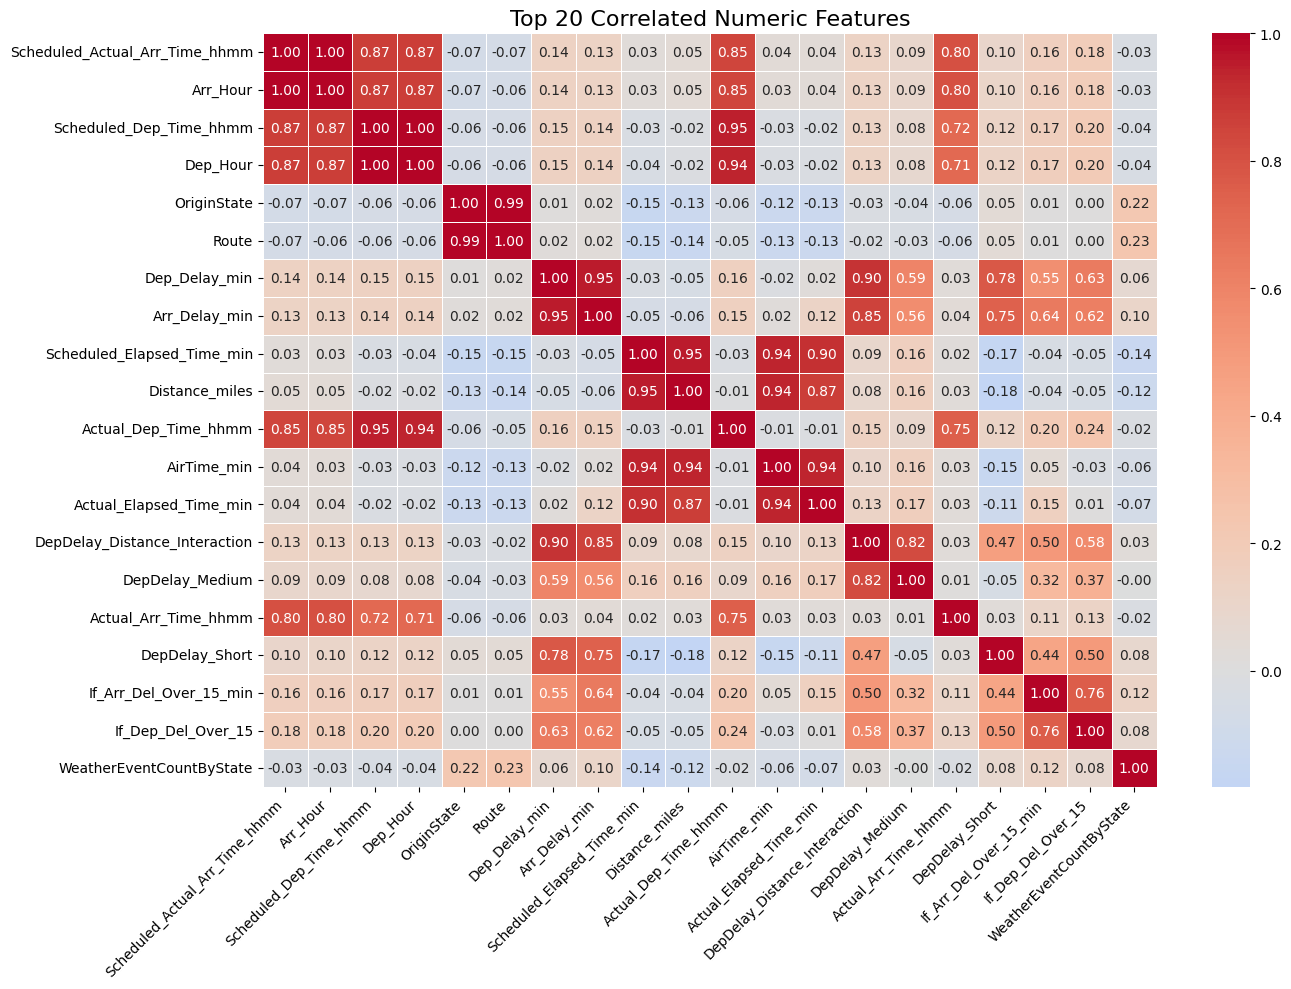

In [ ]:
# eda.draw_correlation_heatmap(df_encoded)
numeric_df = df_encoded.select_dtypes(include='number')

# Step 2: Compute the correlation matrix
correlation_matrix = numeric_df.corr().abs().fillna(0)

# Step 3: Find top 20 correlated features (by maximum correlation with any other feature)
# (ignoring self-correlation)
upper_tri = correlation_matrix.where(~np.eye(correlation_matrix.shape[0],dtype=bool))
top_features = upper_tri.max().sort_values(ascending=False).head(20).index

# Step 4: Subset the matrix to top features
top_corr = numeric_df[top_features].corr()

# Step 5: Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(top_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Top 20 Correlated Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
cols_to_drop = [
    'Scheduled_Dep_Time_hhmm',
    'Scheduled_Actual_Arr_Time_hhmm',
    'Dep_Delay_min',
    'Actual_Elapsed_Time_min',
    'If_Arr_Del_Over_15_min',
    'Actual_Dep_Time_hhmm'
]

df_selected = df_encoded.drop(columns=cols_to_drop)

df_selected.drop(columns=['OriginState', 'DestState'], inplace=True)
df_selected.drop(columns=['Scheduled_Elapsed_Time_min'], inplace=True)
df_selected.drop(columns=['DepTimeOfDay_afternoon', 'DepTimeOfDay_evening',
       'DepTimeOfDay_morning', 'DepTimeOfDay_night'], inplace=True)

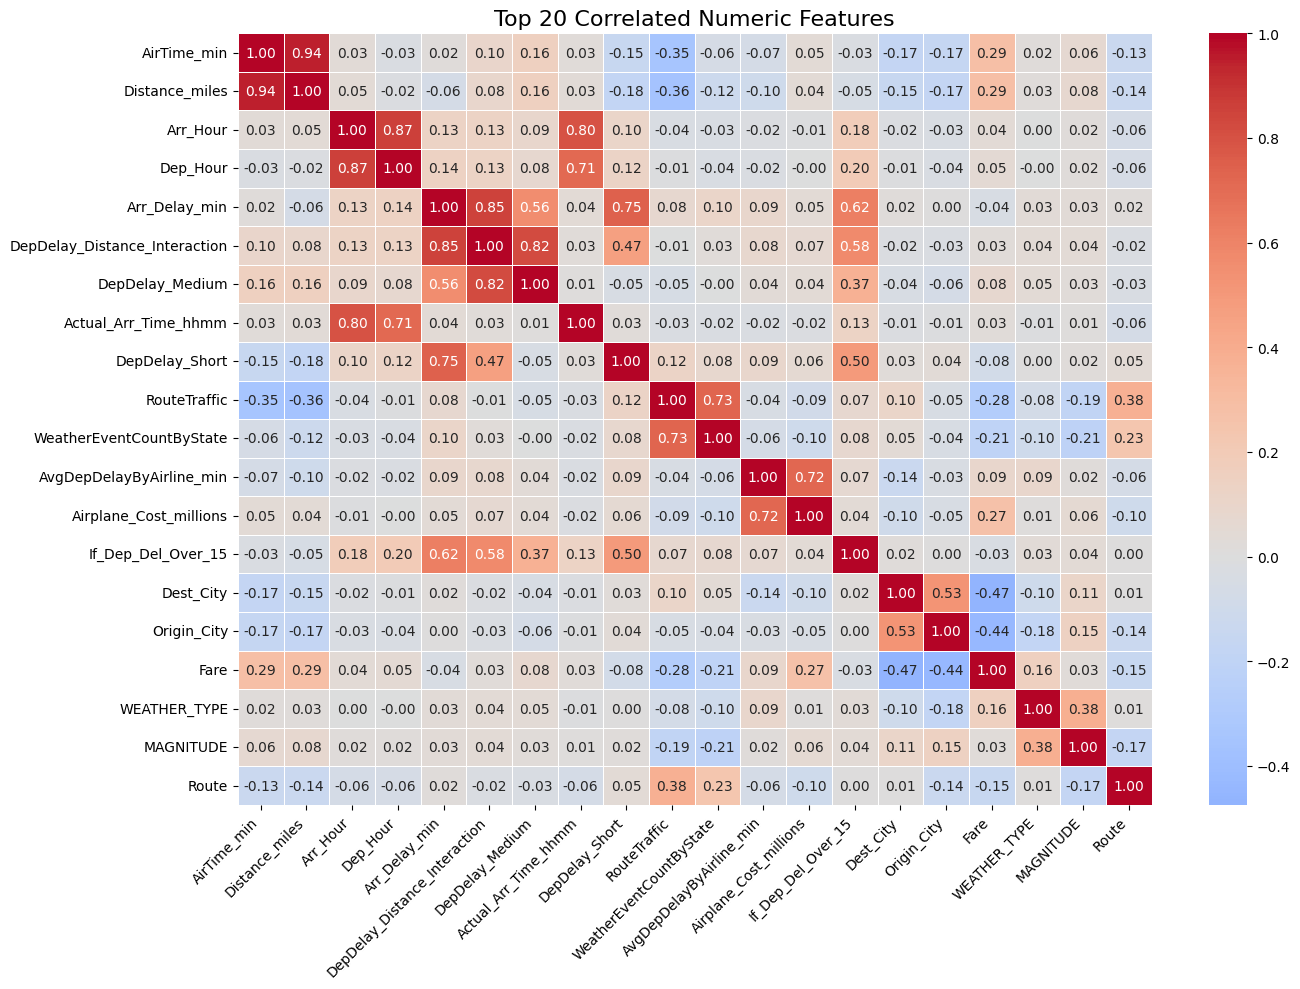

In [57]:
numeric_df = df_selected.select_dtypes(include='number')

# Step 2: Compute the correlation matrix
correlation_matrix = numeric_df.corr().abs().fillna(0)

# Step 3: Find top 20 correlated features (by maximum correlation with any other feature)
# (ignoring self-correlation)
upper_tri = correlation_matrix.where(~np.eye(correlation_matrix.shape[0],dtype=bool))
top_features = upper_tri.max().sort_values(ascending=False).head(20).index

# Step 4: Subset the matrix to top features
top_corr = numeric_df[top_features].corr()

# Step 5: Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(top_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Top 20 Correlated Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [56]:
df_selected.columns

Index(['FlightDate', 'If_Dep_Del_Over_15', 'Actual_Arr_Time_hhmm',
       'Arr_Delay_min', 'AirTime_min', 'Distance_miles', 'Origin_City',
       'Dest_City', 'Fare', 'Airplane_Cost_millions', 'Avg_Airline_Planes_Age',
       'WEATHER_TYPE', 'MAGNITUDE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'WEATHER_SOURCE', 'Dep_Hour', 'Arr_Hour', 'DepDelay_Short',
       'DepDelay_Medium', 'DepDelay_Long', 'DepDelay_Distance_Interaction',
       'Route', 'AvgDepDelayByAirline_min', 'AvgDepDelayByRoute_min',
       'RouteTraffic', 'DayOfWeek', 'WeatherEventCountByState',
       'SevereWeatherFlag', 'Airline_Code_AA', 'Airline_Code_AS',
       'Airline_Code_B6', 'Airline_Code_DL', 'Airline_Code_F9',
       'Airline_Code_NK', 'Airline_Code_UA', 'Airline_Code_VX',
       'Airline_Code_WN', 'ArrTimeOfDay_afternoon', 'ArrTimeOfDay_evening',
       'ArrTimeOfDay_morning', 'ArrTimeOfDay_night',
       'Distance_Bins_miles